In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
df = yf.download('BTC-USD', start='2020-01-01', end='2025-04-20')
df = df[['Close']]
df.dropna(inplace=True)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)


In [4]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [5]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0368
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0012
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0010
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 9.9025e-04
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 9.1443e-04
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 7.5888e-04
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 7.7035e-04
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 6.8093e-04
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 6.3185e-04
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 6.7769e-04


In [7]:
future_input = scaled_data[-time_step:].reshape(1, time_step, 1)

predicted_prices = []
for _ in range(7):
    pred = model.predict(future_input)[0][0]
    predicted_prices.append(pred)
    future_input = np.append(future_input[:, 1:, :], [[[pred]]], axis=1)

# Inverse scale the predictions
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Show result
for i, price in enumerate(predicted_prices):
    print(f"Day {i+1}: ${price[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Day 1: $84044.86
Day 2: $84127.01
Day 3: $84079.19
Day 4: $83942.19
Day 5: $83743.16
Day 6: $83500.82
Day 7: $83227.92


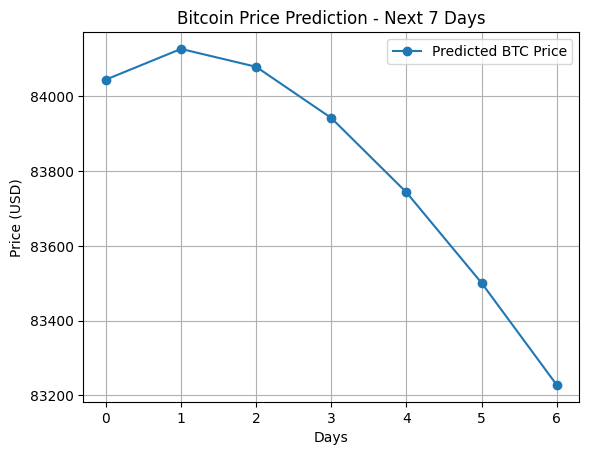

In [8]:
plt.plot(predicted_prices, marker='o', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction - Next 7 Days')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import yfinance as yf
df = yf.download('BTC-USD', start='2020-01-01', end='2025-04-20')
df.to_csv("btc_data_backup.csv")


[*********************100%***********************]  1 of 1 completed
